# Projet de modélisation d'un mix énergétique issu 100% d'ENR

## VII. Profils de production avec la librairie DataFrame

### Imports

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import csv

In [2]:
colors = ["palevioletred", "mediumaquamarine", "cornflowerblue", "royalblue", "slategray", 
          "mediumseagreen", "salmon", "yellow", "khaki", "0.2"]

In [3]:
from data_formatting import Import_data, Formater, Formater_5ans, Formater_17ans

vre2000, vre2001, vre2002, vre2003, vre2004, vre2005, vre2006, vre2007, vre2008, vre2009, vre2010, vre2011, vre2012, vre2013, vre2014, vre2015, vre2016, vre2017 = Import_data()

### 1. Utils

#### 1.1 Création DataFrame avec plusieurs vre

In [4]:
import warnings
warnings.filterwarnings('ignore')
#Profil de production des vre avec indexation sur les dates 
profil_2006 = Formater(vre2006, '2006-01-01')
profil_2006.head()

,offshore,onshore,pv
heure,,,
2006-01-01 00:00:00,0.865143,0.511702,0.0
2006-01-01 01:00:00,0.880000,0.527910,0.0
2006-01-01 02:00:00,0.880000,0.537973,0.0
2006-01-01 03:00:00,0.873429,0.541571,0.0
2006-01-01 04:00:00,0.852000,0.538737,0.0


#### 1.2 Création DataFrame avec plusieurs années

In [5]:
profils_off, profils_on, profils_pv = Formater_5ans(vre2013, vre2014, vre2015, vre2016, vre2017)
profils_off.columns = ["2013","2014","2015","2016",'2017']
profils_off.index = pd.to_datetime(profils_off.index, unit='h')
profils_off.head()

,2013,2014,2015,2016,2017
1970-01-01 00:00:00,0.728429,0.889286,0.674714,0.257286,0.393286
1970-01-01 01:00:00,0.740000,0.899714,0.679000,0.206714,0.400714
1970-01-01 02:00:00,0.753429,0.911429,0.679429,0.203286,0.406429
1970-01-01 03:00:00,0.764286,0.919143,0.702143,0.233000,0.414429
1970-01-01 04:00:00,0.767429,0.926571,0.717429,0.283286,0.433429


##### Pour les autres technologies

In [6]:
profils_on.columns = ["2013","2014","2015","2016",'2017']
profils_on.index = pd.to_datetime(profils_on.index, unit='h')
profils_pv.columns = ["2013","2014","2015","2016",'2017']
profils_pv.index = pd.to_datetime(profils_pv.index, unit='h')

### 2. Profils sur l'année 2006

#### 2.1 Moyenne mensuelle sur l'année 2006

In [7]:
#Profil de production des vre en faisant la moyenne sur chaque mois 
monthly_mean_2006 = profil_2006.resample('M').mean() # M : moyenne sur les mois
monthly_mean_2006.head()
#monthly_mean_2006.shape

,offshore,onshore,pv
heure,,,
2006-01-31,0.532841,0.315165,0.097002
2006-02-28,0.569997,0.340139,0.133640
2006-03-31,0.693567,0.437978,0.150298
2006-04-30,0.468819,0.293009,0.205009
2006-05-31,0.514905,0.338667,0.207210


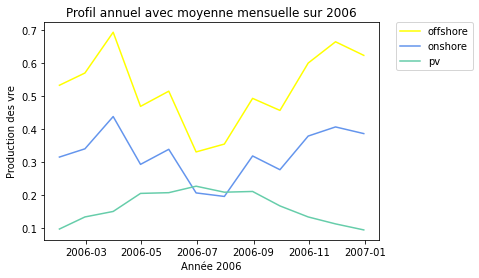

In [8]:
plt.plot(monthly_mean_2006["offshore"], label="offshore", c=colors[-3])
plt.plot(monthly_mean_2006["onshore"], label="onshore", c=colors[2])
plt.plot(monthly_mean_2006["pv"], label="pv", c=colors[1])
plt.title("Profil annuel avec moyenne mensuelle sur 2006")
plt.xlabel("Année 2006")
plt.ylabel("Production des vre")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

#### 2.2 Moyenne glissante sur l'année 2006

In [9]:
monthly_rol_mean_2006 = profil_2006.rolling(window = 720, center = True).mean() 
#moyenne glissante sur un mois 24*30=720
monthly_rol_mean_2006.shape

(8760, 3)

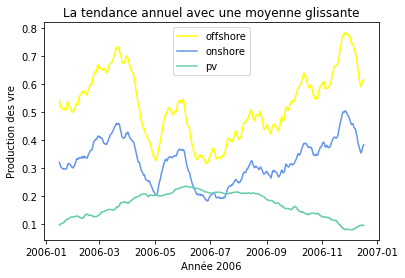

In [10]:
plt.plot(monthly_rol_mean_2006["offshore"], label="offshore", c=colors[-3])
plt.plot(monthly_rol_mean_2006["onshore"], label="onshore", c=colors[2])
plt.plot(monthly_rol_mean_2006["pv"], label="pv", c=colors[1])
plt.title("La tendance annuel avec une moyenne glissante") #tendance roulante
plt.xlabel("Année 2006")
plt.ylabel("Production des vre")
plt.legend()
plt.show()

#### 2.3 Boxplots des tendances de production des vre sur l'année 2006

In [11]:
# Extract the year, month, date separately using the index set
profil_2006['Year'] = profil_2006.index.year
profil_2006['Month'] = profil_2006.index.month
profil_2006['Weekday_Name'] = profil_2006.index.weekday

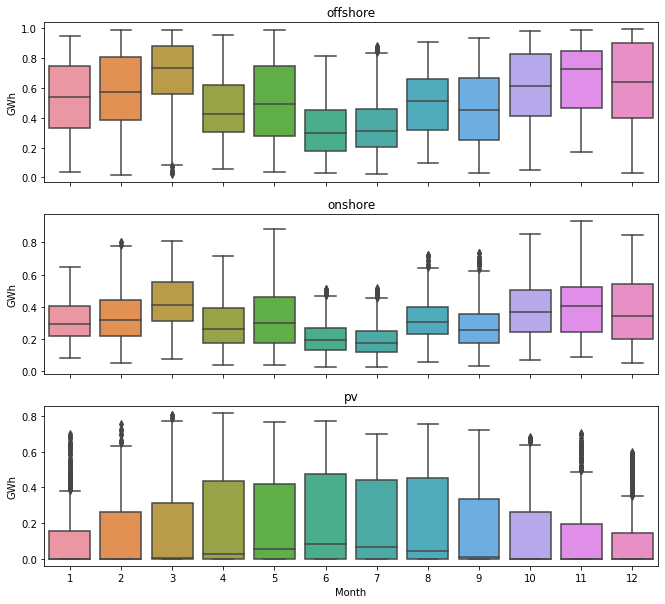

In [12]:
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)
for name, ax in zip(['offshore', 'onshore', 'pv'], axes):
    sns.boxplot(data=profil_2006, x='Month', y=name, ax=ax)
    ax.set_ylabel('GWh')
    ax.set_title(name)
    # Keep the x-axis label for only the bottom subplot
    if ax != axes[-1]:
        ax.set_xlabel('')

### 3. Tendance de la variation inter-années

In [13]:
profils_off_17, profils_on_17, profils_pv_17 = Formater_17ans()
profils_off_17.columns = ["2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017"]
profils_off_17.index = pd.to_datetime(profils_off_17.index, unit='h')
profils_off_17.head()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
1970-01-01 00:00:00,0.460143,0.986857,0.427286,0.737143,0.778000,0.393000,0.865143,0.986714,0.237429,0.388857,0.857571,0.258143,0.924429,0.728429,0.889286,0.674714,0.257286,0.393286
1970-01-01 01:00:00,0.454000,0.986000,0.435286,0.778714,0.814857,0.367429,0.880000,0.987714,0.228286,0.381571,0.867000,0.242429,0.931429,0.740000,0.899714,0.679000,0.206714,0.400714
1970-01-01 02:00:00,0.444000,0.983857,0.442000,0.817714,0.849429,0.348000,0.880000,0.987857,0.223571,0.390571,0.877714,0.230857,0.930571,0.753429,0.911429,0.679429,0.203286,0.406429
1970-01-01 03:00:00,0.445857,0.984571,0.456714,0.846714,0.887429,0.347286,0.873429,0.985286,0.222143,0.413429,0.885429,0.220857,0.918857,0.764286,0.919143,0.702143,0.233000,0.414429
1970-01-01 04:00:00,0.452714,0.981286,0.471000,0.885000,0.914857,0.364714,0.852000,0.983429,0.225571,0.459000,0.881571,0.216857,0.904286,0.767429,0.926571,0.717429,0.283286,0.433429


In [14]:
profils_on_17.columns = ["2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017"]
profils_on_17.index = pd.to_datetime(profils_on_17.index, unit='h')
profils_pv_17.columns = ["2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017"]
profils_pv_17.index = pd.to_datetime(profils_pv_17.index, unit='h')

#### 3.1 Variations production offshore inter-années

In [15]:
profils_off_year = profils_off_17.resample('Y').mean()  # M : moyenne de la production par mois
profils_off_year.head()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
1970-12-31,0.53849,0.537274,0.54699,0.503128,0.508628,0.507061,0.525416,0.532022,0.536335,0.505621,0.505213,0.522105,0.52211,0.532797,0.509067,0.549454,0.502815,0.503677


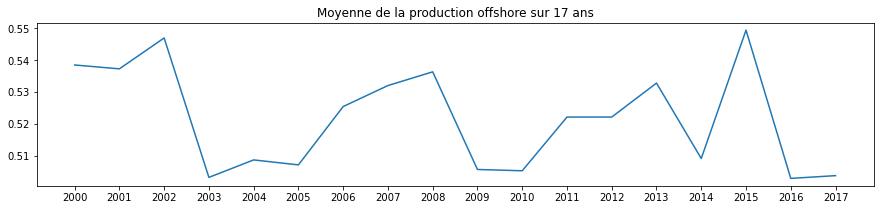

In [16]:
tab_ans_off = []
ans = ["2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017"]
for an in ans:
    tab_ans_off += [profils_off_year[an]]

plt.figure(figsize=(15,3))
plt.plot(ans, tab_ans_off)
plt.title("Moyenne de la production offshore sur 17 ans")
plt.show()

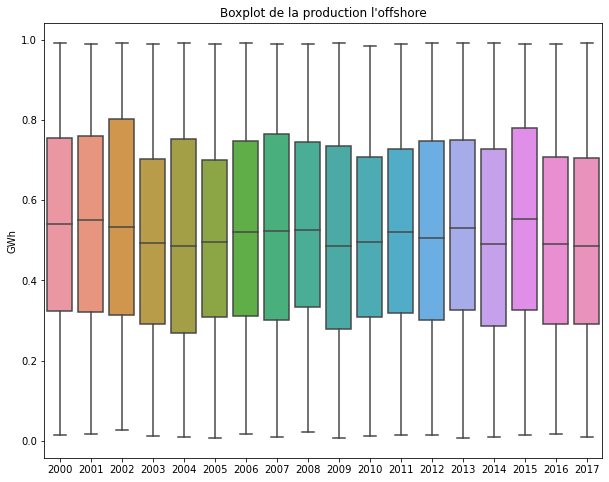

In [17]:
fig = plt.figure(figsize=(10, 8))
sns.boxplot(data=profils_off_17)
plt.ylabel('GWh')
plt.title("Boxplot de la production l'offshore")
plt.show()

In [18]:
sum_off = profils_off_17.agg(['mean', 'std', 'min', 'max'])
sum_off

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
mean,0.538490,0.537274,0.546990,0.503128,0.508628,0.507061,0.525416,0.532022,0.536335,0.505621,0.505213,0.522105,0.522110,0.532797,0.509067,0.549454,0.502815,0.503677
std,0.264696,0.256395,0.271462,0.252637,0.271654,0.247693,0.259725,0.266998,0.255504,0.263037,0.244668,0.248411,0.260458,0.255635,0.263693,0.262452,0.253619,0.251849
min,0.015143,0.016857,0.026286,0.011143,0.009857,0.007714,0.017429,0.009000,0.022143,0.007286,0.011429,0.014571,0.015429,0.008000,0.009571,0.015857,0.016143,0.011000
max,0.990714,0.990286,0.992286,0.988714,0.991143,0.990000,0.991143,0.990429,0.989286,0.991429,0.983714,0.989714,0.991714,0.991714,0.990714,0.990429,0.989286,0.992571


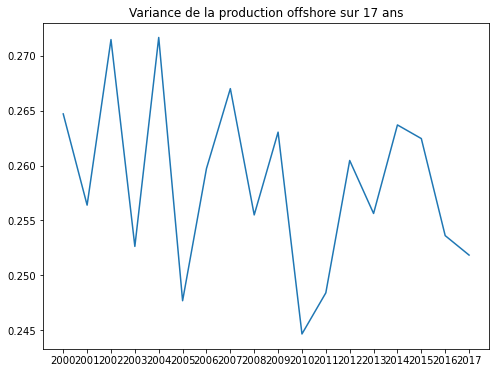

In [19]:
plt.figure(figsize=(8,6))
plt.plot(sum_off.loc["std"], label='Variance')
#plt.plot(sum_off.loc["mean"], label='Moyenne')
plt.title("Variance de la production offshore sur 17 ans")
plt.show()

#### 3.2 Variations production onshore inter-années

In [20]:
profils_on_year = profils_on_17.resample('Y').mean()  # Y : moyenne de la production sur l'annee
#profils_on_year.head()

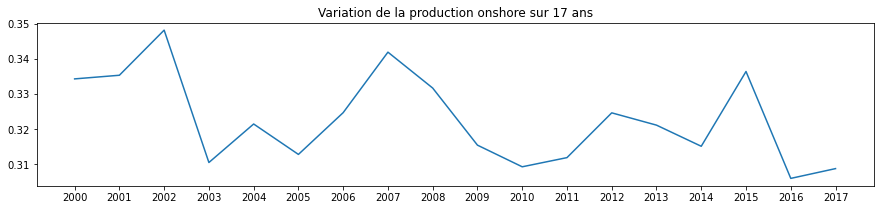

In [21]:
tab_ans_on = []
ans = ["2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017"]
for an in ans:
    tab_ans_on += [profils_on_year[an]]

plt.figure(figsize=(15,3))
plt.plot(ans, tab_ans_on)
plt.title("Variation de la production onshore sur 17 ans")
plt.show()

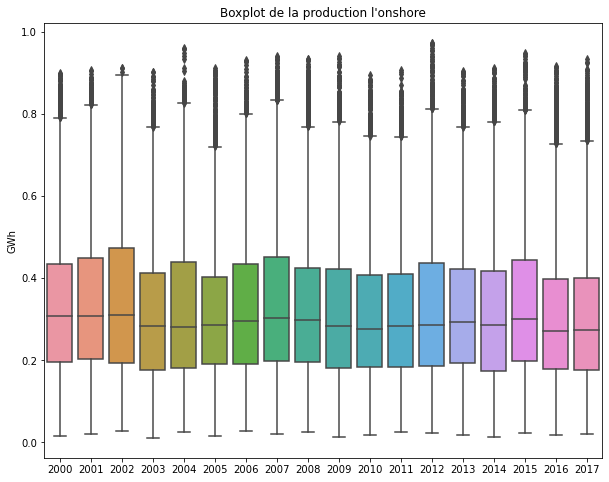

In [22]:
fig = plt.figure(figsize=(10, 8))
sns.boxplot(data=profils_on_17)
plt.ylabel('GWh')
plt.title("Boxplot de la production l'onshore")
plt.show()

In [23]:
sum_on = profils_on_17.agg(['mean', 'std', 'min', 'max'])
sum_on

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
mean,0.334296,0.335328,0.348143,0.310549,0.321488,0.312849,0.324709,0.341890,0.331692,0.315480,0.309332,0.311937,0.324653,0.321163,0.315161,0.336394,0.306040,0.308817
std,0.181168,0.174838,0.193040,0.170156,0.182065,0.163021,0.173192,0.192640,0.178909,0.170038,0.163919,0.165978,0.177166,0.168361,0.176211,0.179114,0.170765,0.173750
min,0.016514,0.019512,0.027419,0.010617,0.025402,0.016049,0.027760,0.020684,0.025010,0.013730,0.018220,0.025057,0.022875,0.017545,0.013362,0.021952,0.018589,0.020301
max,0.900171,0.906942,0.912101,0.902649,0.959716,0.911861,0.931505,0.940450,0.934366,0.940273,0.893381,0.906431,0.973245,0.903438,0.911272,0.947274,0.915751,0.934740


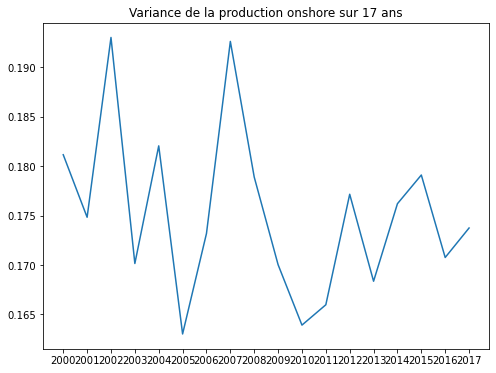

In [24]:
plt.figure(figsize=(8,6))
plt.plot(sum_on.loc["std"], label='Variance')
#plt.plot(sum_on.loc["mean"], label='Moyenne')
plt.title("Variance de la production onshore sur 17 ans")
plt.show()

#### 3.3 Variations prodution solaire inter-années 

In [25]:
profils_pv_year = profils_pv_17.resample('Y').mean()  # M : moyenne de la production par mois
#profils_pv_year.head()

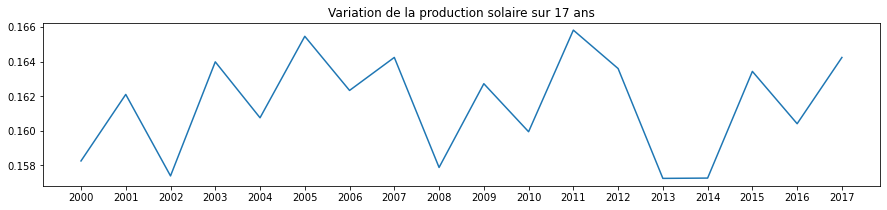

In [26]:
tab_ans_pv = []
ans = ["2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017"]
for an in ans:
    tab_ans_pv += [profils_pv_year[an]]

plt.figure(figsize=(15,3))
plt.plot(ans, tab_ans_pv)
plt.title("Variation de la production solaire sur 17 ans")
plt.show()

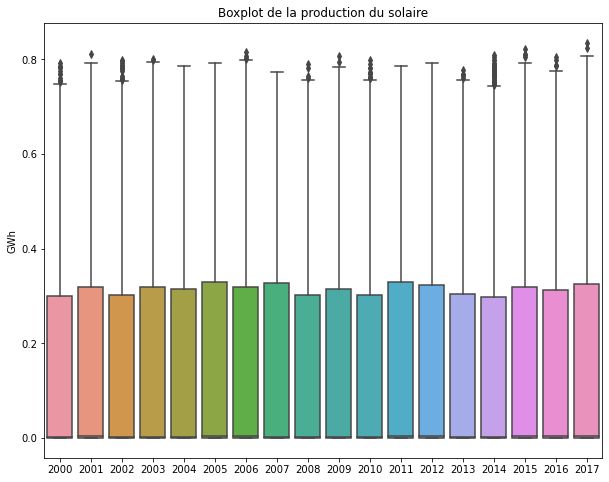

In [27]:
fig = plt.figure(figsize=(10, 8))
sns.boxplot(data=profils_pv_17)
plt.ylabel('GWh')
plt.title("Boxplot de la production du solaire")
plt.show()

In [28]:
sum_pv = profils_pv_17.agg(['mean', 'std', 'min', 'max'])
sum_pv

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
mean,0.158250,0.162097,0.157384,0.163982,0.160747,0.165459,0.162328,0.164238,0.157874,0.162718,0.159940,0.165816,0.163594,0.157242,0.157259,0.163429,0.160403,0.164236
std,0.220300,0.222792,0.218714,0.226238,0.221637,0.225112,0.222457,0.224197,0.218500,0.225481,0.222456,0.227328,0.225023,0.217349,0.219623,0.223736,0.221191,0.225291
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.792741,0.810229,0.798710,0.800364,0.785677,0.792356,0.815044,0.773838,0.789568,0.807115,0.798100,0.785495,0.792641,0.776426,0.808622,0.822659,0.803826,0.835063


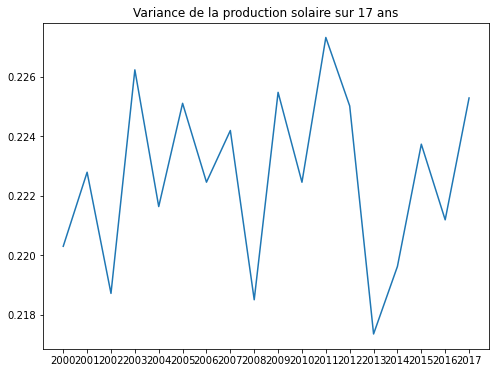

In [29]:
plt.figure(figsize=(8,6))
plt.plot(sum_pv.loc["std"])
plt.title("Variance de la production solaire sur 17 ans")
plt.show()

### 4. Profils détaillés des vre

#### 4.1 Profil offshore

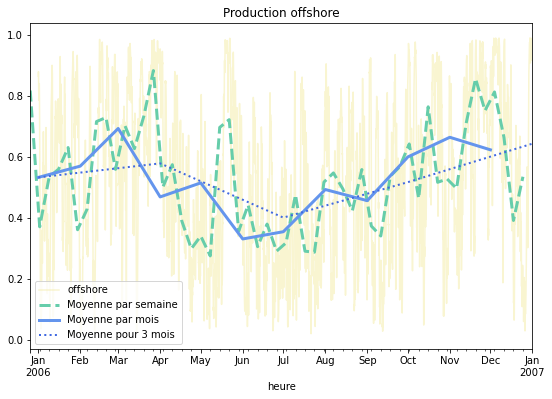

In [30]:
plt.figure(figsize=(9,6))
profil_2006["offshore"].plot(c=colors[-2], alpha=0.4)
profil_2006["offshore"].resample('W').mean().plot(label='Moyenne par semaine', lw=3, ls='--', alpha=1, c=colors[1])
profil_2006["offshore"].resample('M').mean().plot(label='Moyenne par mois', lw=3, ls='-', alpha=1, c=colors[2])
profil_2006["offshore"].resample('3M').mean().plot(label='Moyenne pour 3 mois', lw=2, ls=':', alpha=1, c=colors[3])
plt.legend()
plt.title("Production offshore")
plt.show()

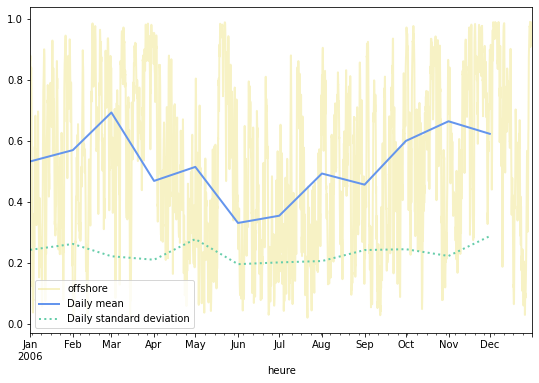

In [31]:
vre = 'offshore'
plt.figure(figsize=(9,6))
profil_2006[vre].plot(c=colors[-2], alpha=0.5, lw=2)
#plt.fill_between(tab_pv.index, tab_pv['max'], tab_pv['min'], alpha=0.2, label='min-max par mois')
profil_2006[vre].resample('M').mean().plot(label='Daily mean', lw=2, ls='-', alpha=1, c=colors[2])
profil_2006[vre].resample('M').std().plot(label="Daily standard deviation", c=colors[1], lw=2, ls=':')
plt.legend()
#plt.title("Production solaire")
plt.show()

In [32]:
print(np.mean(profil_2006["offshore"]))
print(np.std(profil_2006["offshore"]))

0.525416275278312
0.25971039418967495


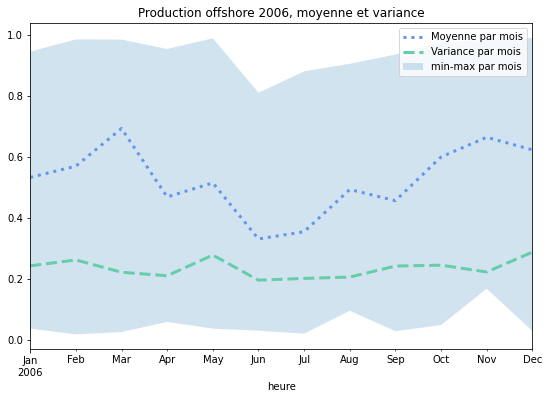

In [33]:
tab_off = profil_2006["offshore"].resample('M').agg(['mean', 'std', 'min', 'max'])
plt.figure(figsize=(9,6))
tab_off['mean'].plot(label="Moyenne par mois", c=colors[2], lw=3, ls=':')
tab_off['std'].plot(label="Variance par mois", c=colors[1], lw=3, ls='--')
plt.fill_between(tab_off.index, tab_off['max'], tab_off['min'], alpha=0.2, label='min-max par mois')
plt.legend()
plt.title("Production offshore 2006, moyenne et variance")
plt.show()

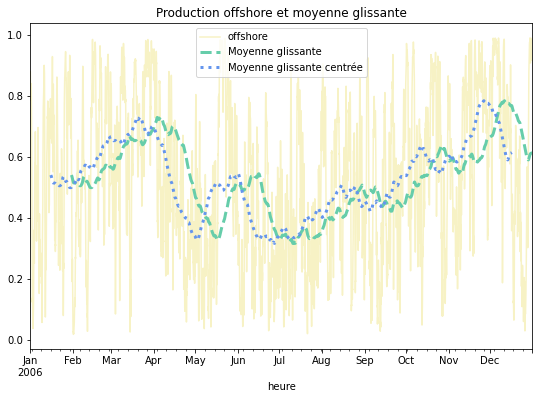

In [34]:
plt.figure(figsize=(9,6))
profil_2006["offshore"].plot(c=colors[-2], alpha=0.5)
profil_2006["offshore"].rolling(window=720).mean().plot(label='Moyenne glissante', lw=3, ls='--', alpha=1, c=colors[1])
profil_2006["offshore"].rolling(window=720, center=True).mean().plot(label='Moyenne glissante centrée', lw=3, ls=':', alpha=1, c=colors[2])
plt.legend()
plt.title("Production offshore et moyenne glissante")
plt.show()

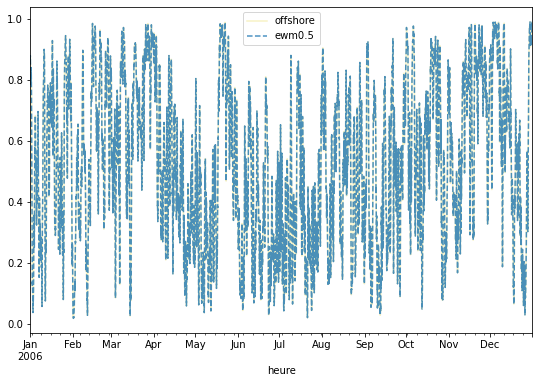

In [35]:
plt.figure(figsize=(9,6))
profil_2006["offshore"].plot(c=colors[-2], alpha=0.5)
#for i in np.arange(0.2, 1, 0.2):
profil_2006['offshore'].ewm(alpha=1).mean().plot(label=f'ewm{0.5}', ls='--', alpha=0.8)
plt.legend()
plt.show()

In [36]:
profils_off_month = profils_off.resample('M').mean()  # M : moyenne de la production par mois
profils_off_month.head()

,2013,2014,2015,2016,2017
1970-01-31,0.529048,0.695092,0.652542,0.726429,0.502453
1970-02-28,0.623539,0.806214,0.602838,0.679658,0.624213
1970-03-31,0.557033,0.479566,0.561559,0.585978,0.606497
1970-04-30,0.594045,0.438106,0.472404,0.480466,0.373078
1970-05-31,0.512842,0.482167,0.511554,0.421825,0.456978


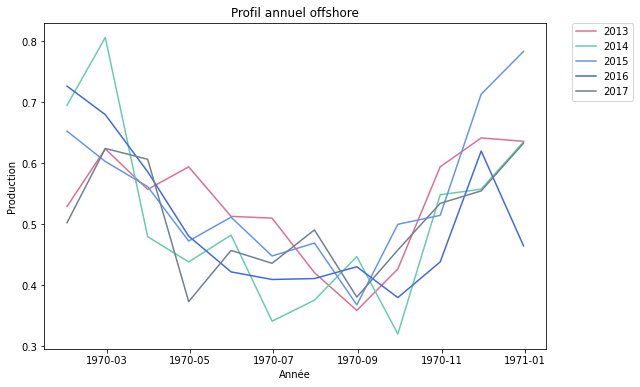

In [37]:
anss = ["2013", "2014", "2015", "2016", "2017"]
plt.figure(figsize=(9,6))
for i in range(5):
    plt.plot(profils_off_month[anss[i]], label=anss[i], color=colors[i])
plt.xlabel("Année")
plt.ylabel("Production")
plt.title("Profil annuel offshore")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

#### 4.2 Profils onshore

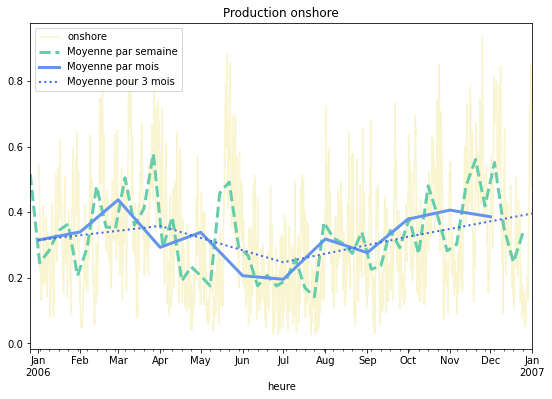

In [38]:
plt.figure(figsize=(9,6))
profil_2006["onshore"].plot(c=colors[-2], alpha=0.4)
profil_2006["onshore"].resample('W').mean().plot(label='Moyenne par semaine', lw=3, ls='--', alpha=1, c=colors[1])
profil_2006["onshore"].resample('M').mean().plot(label='Moyenne par mois', lw=3, ls='-', alpha=1, c=colors[2])
profil_2006["onshore"].resample('3M').mean().plot(label='Moyenne pour 3 mois', lw=2, ls=':', alpha=1, c=colors[3])
plt.legend()
plt.title("Production onshore")
plt.show()

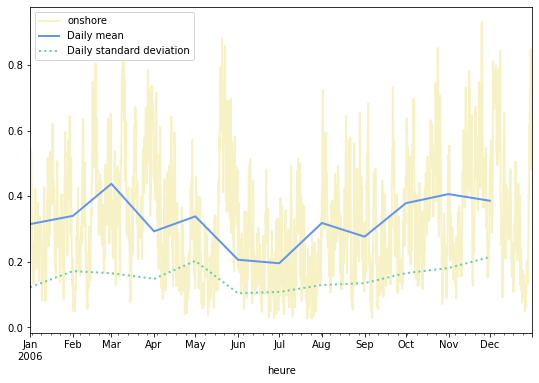

In [39]:
vre = 'onshore'
plt.figure(figsize=(9,6))
profil_2006[vre].plot(c=colors[-2], alpha=0.5, lw=2)
#plt.fill_between(tab_pv.index, tab_pv['max'], tab_pv['min'], alpha=0.2, label='min-max par mois')
profil_2006[vre].resample('M').mean().plot(label='Daily mean', lw=2, ls='-', alpha=1, c=colors[2])
profil_2006[vre].resample('M').std().plot(label="Daily standard deviation", c=colors[1], lw=2, ls=':')
plt.legend()
#plt.title("Production solaire")
plt.show()

In [40]:
print(np.mean(profil_2006["onshore"]))
print(np.std(profil_2006["onshore"]))

0.3247094117567348
0.1731821832414827


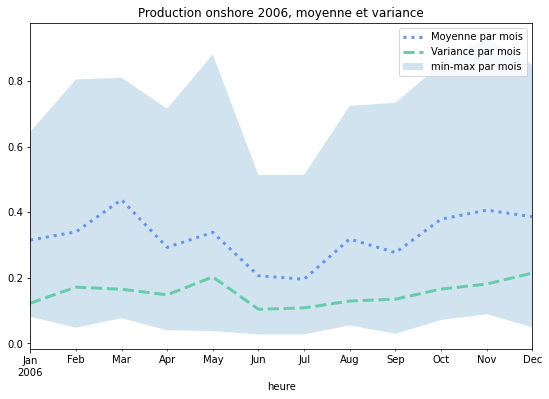

In [41]:
tab_off = profil_2006["onshore"].resample('M').agg(['mean', 'std', 'min', 'max'])
plt.figure(figsize=(9,6))
tab_off['mean'].plot(label="Moyenne par mois", c=colors[2], lw=3, ls=':')
tab_off['std'].plot(label="Variance par mois", c=colors[1], lw=3, ls='--')
plt.fill_between(tab_off.index, tab_off['max'], tab_off['min'], alpha=0.2, label='min-max par mois')
plt.legend()
plt.title("Production onshore 2006, moyenne et variance")
plt.show()

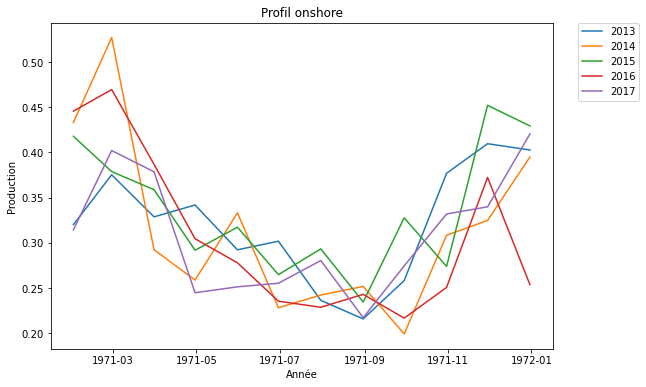

In [42]:
plt.figure(figsize=(9,6))
profils_on_month = profils_on.resample('M').mean()   # M : moyenne de la production par mois
plt.plot(profils_on_month, label=["2013", "2014", "2015", "2016", "2017"])
plt.xlabel("Année")
plt.ylabel("Production")
plt.title("Profil onshore")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

#### 4.3 Profils pv

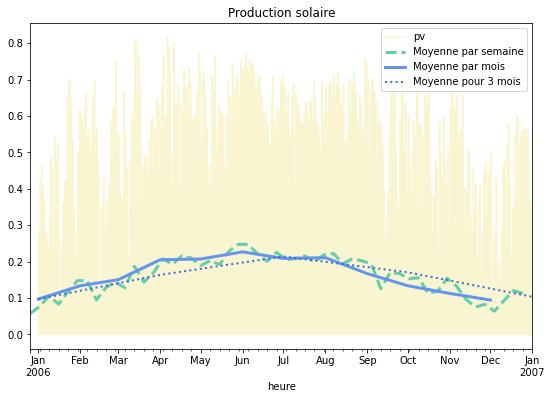

In [43]:
plt.figure(figsize=(9,6))
profil_2006["pv"].plot(c=colors[-2], alpha=0.4)
profil_2006["pv"].resample('W').mean().plot(label='Moyenne par semaine', lw=3, ls='--', alpha=1, c=colors[1])
profil_2006["pv"].resample('M').mean().plot(label='Moyenne par mois', lw=3, ls='-', alpha=1, c=colors[2])
profil_2006["pv"].resample('3M').mean().plot(label='Moyenne pour 3 mois', lw=2, ls=':', alpha=1, c=colors[3])
plt.legend()
plt.title("Production solaire")
plt.show()

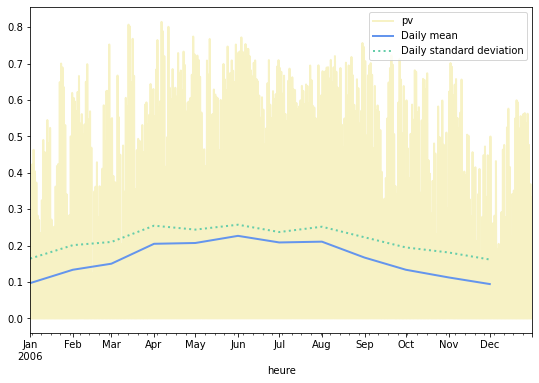

In [44]:
vre = 'pv'
plt.figure(figsize=(9,6))
profil_2006[vre].plot(c=colors[-2], alpha=0.5, lw=2)
#plt.fill_between(tab_pv.index, tab_pv['max'], tab_pv['min'], alpha=0.2, label='min-max par mois')
profil_2006[vre].resample('M').mean().plot(label='Daily mean', lw=2, ls='-', alpha=1, c=colors[2])
profil_2006[vre].resample('M').std().plot(label="Daily standard deviation", c=colors[1], lw=2, ls=':')
plt.legend()
#plt.title("Production solaire")
plt.show()

In [45]:
print(np.mean(profil_2006["pv"]))
print(np.std(profil_2006["pv"]))

0.16232831887408686
0.22244476837222216


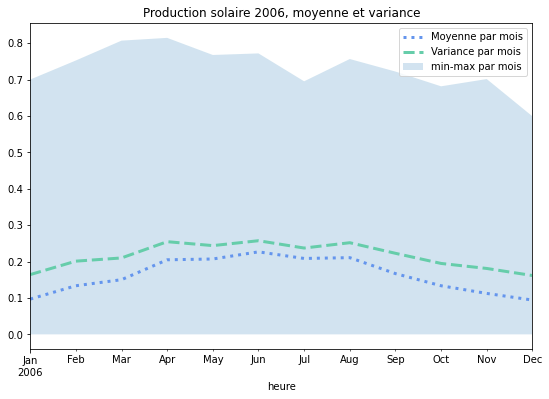

In [46]:
tab_pv = profil_2006["pv"].resample('M').agg(['mean', 'std', 'min', 'max'])
plt.figure(figsize=(9,6))
tab_pv['mean'].plot(label="Moyenne par mois", c=colors[2], lw=3, ls=':')
tab_pv['std'].plot(label="Variance par mois", c=colors[1], lw=3, ls='--')
plt.fill_between(tab_pv.index, tab_pv['max'], tab_pv['min'], alpha=0.2, label='min-max par mois')
plt.legend()
plt.title("Production solaire 2006, moyenne et variance")
plt.show()

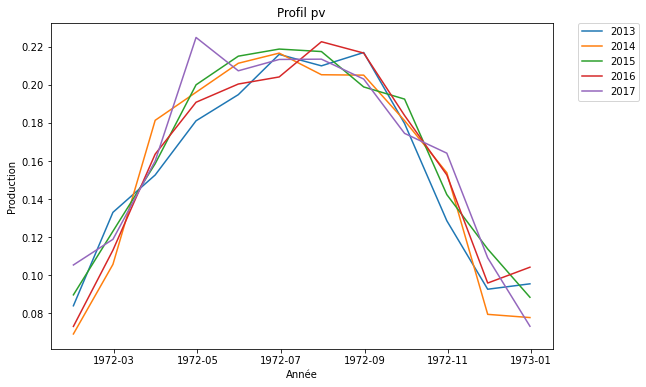

In [47]:
plt.figure(figsize=(9,6))
profils_pv_month = profils_pv.resample('M').mean()   # M : moyenne de la production par mois
plt.plot(profils_pv_month, label=["2013", "2014", "2015", "2016", "2017"])
plt.xlabel("Année")
plt.ylabel("Production")
plt.title("Profil pv")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()